In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#removing the 'null'
missing_values=['(null)']
df= pd.read_csv('NYPD Arrest Data Year to Date.csv',na_values=missing_values)

In [9]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)


In [10]:
df.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
170090,270955727,07/07/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601002,F,B,52,0,25-44,M,BLACK,1017273,255924,40.869067,-73.880600,POINT (-73.8806 40.869067)
170091,273117887,08/18/2023,681,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,B,47,0,25-44,F,BLACK,1026480,262584,40.887314,-73.847272,POINT (-73.8472717577564 40.8873136344706)
170092,274301006,09/13/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,S,122,0,25-44,M,WHITE HISPANIC,951857,161569,40.610087,-74.116666,POINT (-74.11666648991874 40.6100867091453)
170093,269912233,06/15/2023,490,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY,PL 1654000,M,K,62,0,25-44,M,BLACK,983469,157947,40.600204,-74.002812,POINT (-74.00281242 40.60020423)
170094,272045762,07/28/2023,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,K,84,0,18-24,M,BLACK,988491,195163,40.702353,-73.984704,POINT (-73.98470449707197 40.70235306254946)


In [5]:
df.shape

(170095, 19)

In [11]:
#displaying large protion of rows and columns
pd.options.display.max_rows = 250
df.head(250)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)
5,262030390,01/17/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,113,0,45-64,F,BLACK,1040264,190275,40.688762,-73.798020,POINT (-73.79802 40.688762)
6,262362214,01/23/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999439,236537,40.815904,-73.945123,POINT (-73.945123 40.815904)
7,264579718,03/04/2023,153,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,0,<18,M,BLACK,997843,175671,40.648851,-73.951017,POINT (-73.951016510623 40.6488507469884)
8,262500981,01/25/2023,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,M,14,0,45-64,M,BLACK,987078,215157,40.757232,-73.989792,POINT (-73.98979219 40.75723226)
9,265281035,03/17/2023,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402501,F,M,24,0,45-64,M,BLACK,992960,230413,40.799102,-73.968541,POINT (-73.96854103 40.79910212)


In [12]:
#displaying view of all offenses listed
df.groupby(['OFNS_DESC'])['OFNS_DESC'].count().sort_values(ascending=False)

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES            25200
PETIT LARCENY                           18025
FELONY ASSAULT                          16030
DANGEROUS DRUGS                         11526
MISCELLANEOUS PENAL LAW                 11132
VEHICLE AND TRAFFIC LAWS                 9442
CRIMINAL MISCHIEF & RELATED OF           8333
ROBBERY                                  8169
GRAND LARCENY                            7901
DANGEROUS WEAPONS                        7245
OFFENSES AGAINST PUBLIC ADMINI           5148
BURGLARY                                 4753
OTHER OFFENSES RELATED TO THEF           4123
SEX CRIMES                               3901
OFFENSES INVOLVING FRAUD                 3846
OFF. AGNST PUB ORD SENSBLTY &            3044
POSSESSION OF STOLEN PROPERTY            2738
FORGERY                                  2591
INTOXICATED & IMPAIRED DRIVING           1953
OTHER TRAFFIC INFRACTION                 1615
GRAND LARCENY OF MOTOR VEHICLE           1470
MURDER & NON-NEGL. MANSL

In [16]:
#dispplaying view of all law codes listed
df.groupby(['LAW_CAT_CD'])['OFNS_DESC'].count().sort_values(ascending=False)

LAW_CAT_CD
M    93347
F    73853
V      973
9      459
I      193
Name: OFNS_DESC, dtype: int64

In [22]:
#trying to see what law code 9 and I are/mean
df[df['LAW_CAT_CD']== '9']
df_lc9=df[df['LAW_CAT_CD']== '9']
df_lc9.head(100)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
807,262409281,01/24/2023,849,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,9,Q,107,0,25-44,M,WHITE HISPANIC,1036628,204948,40.729059,-73.811018,POINT (-73.811018 40.729059)
1690,266749756,04/16/2023,849,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,9,Q,102,0,45-64,M,UNKNOWN,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)
2443,262223841,01/19/2023,849,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,9,Q,109,0,25-44,M,ASIAN / PACIFIC ISLANDER,1037157,215472,40.757941,-73.809027,POINT (-73.809027 40.757941)
2966,264116192,02/23/2023,849,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,9,Q,113,3,18-24,M,ASIAN / PACIFIC ISLANDER,1046315,187088,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666)
3203,264784021,03/09/2023,849,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,9,Q,115,3,25-44,M,BLACK,1018623,214936,40.756568,-73.875932,POINT (-73.8759315341335 40.7565675846374)
3299,262820315,02/01/2023,849,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,9,Q,102,0,25-44,F,WHITE,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)
3894,264430515,03/02/2023,849,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,9,Q,107,0,45-64,M,WHITE,1036628,204948,40.729059,-73.811018,POINT (-73.811018 40.729059)
4043,262087304,01/18/2023,849,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,9,Q,102,0,25-44,M,BLACK,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)
4218,261786919,01/12/2023,849,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,9,Q,113,3,25-44,M,BLACK,1046315,187088,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666)
4849,265470864,03/22/2023,849,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,9,Q,102,0,25-44,M,WHITE HISPANIC,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)


In [23]:
#trying to see what law code 9 and I are/mean
df[df['LAW_CAT_CD']== 'I']
df_lcI=df[df['LAW_CAT_CD']== 'I']
df_lcI.head(100)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
1411,262111757,01/18/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL04020BI,I,Q,106,0,25-44,M,WHITE,1025769,182071,40.666322,-73.850339,POINT (-73.85033924 40.66632217)
1642,263660978,02/15/2023,940,LEAVING THE SCENE / PROPERTY DAMAGE / INJURED ...,881.0,OTHER TRAFFIC INFRACTION,VTL060001A,I,Q,103,0,25-44,M,WHITE HISPANIC,1041879,197083,40.707439,-73.792139,POINT (-73.792139 40.707439)
1715,261519741,01/07/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL11110D1,I,M,30,0,45-64,M,WHITE HISPANIC,999139,240636,40.827153,-73.946201,POINT (-73.94620092 40.82715314)
2573,261667215,01/10/2023,879,"ADM.CODE,UNCLASSIFIED VIOLATIO",675.0,ADMINISTRATIVE CODE,AC 0019190,I,S,122,0,45-64,M,WHITE,954771,148450,40.574091,-74.106113,POINT (-74.106113 40.574091)
3100,268059184,05/10/2023,939,IMPROPER LIGHTS,881.0,OTHER TRAFFIC INFRACTION,VTL03750XA,I,Q,106,0,45-64,F,ASIAN / PACIFIC ISLANDER,1031386,189443,40.686528,-73.830041,POINT (-73.83004051 40.68652849)
4278,263465001,02/12/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL1192AI1,I,M,5,0,25-44,M,BLACK,985236,200002,40.715638,-73.996442,POINT (-73.996442 40.715638)
4811,264530656,03/03/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL1192AI1,I,M,5,0,25-44,F,BLACK,984643,199213,40.713470,-73.998582,POINT (-73.99858237 40.71347036)
5185,268212744,05/13/2023,968,UNLICENSED OPERATOR,880.0,MOVING INFRACTIONS,VTL0509001,I,B,52,0,25-44,M,WHITE HISPANIC,1013073,254152,40.864216,-73.895795,POINT (-73.89579452 40.86421608)
6582,264535493,03/04/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL1192AI1,I,M,20,0,25-44,M,ASIAN / PACIFIC ISLANDER,991202,224999,40.784252,-73.974898,POINT (-73.9748976664227 40.7842519786623)
6734,262544331,01/26/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL03750EB,I,K,77,0,25-44,M,BLACK,998119,185275,40.675203,-73.950001,POINT (-73.95000071 40.67520292)


In [24]:
#limiting table to specific columns
df[['PD_DESC','OFNS_DESC','LAW_CAT_CD', 'ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE']]
df_new=df[['PD_DESC','OFNS_DESC','LAW_CAT_CD', 'ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE']]
pd.options.display.max_rows = 250
df_new.head(250)

,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
0,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,F,K,45-64,F,BLACK
1,"CONTROLLED SUBSTANCE,SALE 3",DANGEROUS DRUGS,F,K,25-44,M,BLACK
2,STRANGULATION 1ST,FELONY ASSAULT,F,K,25-44,M,WHITE
3,STRANGULATION 1ST,FELONY ASSAULT,F,M,25-44,M,BLACK
4,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,F,K,25-44,M,BLACK
5,STRANGULATION 1ST,FELONY ASSAULT,F,Q,45-64,F,BLACK
6,STRANGULATION 1ST,FELONY ASSAULT,F,M,25-44,M,BLACK
7,RAPE 3,RAPE,F,K,<18,M,BLACK
8,"FORGERY,ETC.,UNCLASSIFIED-FELO",FORGERY,F,M,45-64,M,BLACK
9,"BURGLARY,UNCLASSIFIED,UNKNOWN",BURGLARY,F,M,45-64,M,BLACK


In [41]:
#removing law code 9 (other state laws)and I (traffic, administrative)
df_new1=df_new.drop(df_lc9.index)
df_new2=df_new1.drop(df_lcI.index)
df_new2

,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
0,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,F,K,45-64,F,BLACK
1,"CONTROLLED SUBSTANCE,SALE 3",DANGEROUS DRUGS,F,K,25-44,M,BLACK
2,STRANGULATION 1ST,FELONY ASSAULT,F,K,25-44,M,WHITE
3,STRANGULATION 1ST,FELONY ASSAULT,F,M,25-44,M,BLACK
4,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,F,K,25-44,M,BLACK
...,...,...,...,...,...,...,...
170090,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,F,B,25-44,M,BLACK
170091,"CHILD, ENDANGERING WELFARE",SEX CRIMES,M,B,25-44,F,BLACK
170092,"TRAFFIC,UNCLASSIFIED INFRACTIO",OTHER TRAFFIC INFRACTION,M,S,25-44,M,WHITE HISPANIC
170093,"STOLEN PROPERTY 3,POSSESSION",POSSESSION OF STOLEN PROPERTY,M,K,25-44,M,BLACK


In [175]:
df_new2.shape

(169443, 7)

In [40]:
df_new2.groupby(['LAW_CAT_CD'])['OFNS_DESC'].count().sort_values(ascending=False)

LAW_CAT_CD
M    93347
F    73853
V      973
Name: OFNS_DESC, dtype: int64

In [47]:
#renaming columns
df_rename=df_new2.rename(columns={'OFNS_DESC':'OFFENSE_DESCRIPTION','LAW_CAT_CD':'LEVEL_OF_OFFENSE', 'ARREST_BORO': 'ARREST_BOROUGH'})

#creating dictionary of replacements for Offenses
replacements={'F':'Felony','M':'Misdemeanor','V':'Violation'}
df_rename['LEVEL_OF_OFFENSE']=df_rename['LEVEL_OF_OFFENSE'].map(replacements)

#creating dictionary of replacements for Borough
replacements={'K':'Brooklyn','Q':'Queens', 'M':'Manhattan','B':'Bronx','S':'Staten Island'}
df_rename['ARREST_BOROUGH']=df_rename['ARREST_BOROUGH'].map(replacements)

#creating dictionary of replacements for Sex
replacements={'F':'Female','M':'Male'}
df_rename['PERP_SEX']=df_rename['PERP_SEX'].map(replacements)

df_rename

,PD_DESC,OFFENSE_DESCRIPTION,LEVEL_OF_OFFENSE,ARREST_BOROUGH,AGE_GROUP,PERP_SEX,PERP_RACE
0,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,Felony,Brooklyn,45-64,Female,BLACK
1,"CONTROLLED SUBSTANCE,SALE 3",DANGEROUS DRUGS,Felony,Brooklyn,25-44,Male,BLACK
2,STRANGULATION 1ST,FELONY ASSAULT,Felony,Brooklyn,25-44,Male,WHITE
3,STRANGULATION 1ST,FELONY ASSAULT,Felony,Manhattan,25-44,Male,BLACK
4,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,Felony,Brooklyn,25-44,Male,BLACK
...,...,...,...,...,...,...,...
170090,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,Felony,Bronx,25-44,Male,BLACK
170091,"CHILD, ENDANGERING WELFARE",SEX CRIMES,Misdemeanor,Bronx,25-44,Female,BLACK
170092,"TRAFFIC,UNCLASSIFIED INFRACTIO",OTHER TRAFFIC INFRACTION,Misdemeanor,Staten Island,25-44,Male,WHITE HISPANIC
170093,"STOLEN PROPERTY 3,POSSESSION",POSSESSION OF STOLEN PROPERTY,Misdemeanor,Brooklyn,25-44,Male,BLACK


In [48]:
#making sure there were no unknowns in the sex category
df_rename.groupby(['PERP_SEX'])['PERP_SEX'].count().sort_values(ascending=False)

PERP_SEX
Male      137008
Female     28942
Name: PERP_SEX, dtype: int64

In [49]:
#making sure there were no unknowns in the borough category
df_rename.groupby(['ARREST_BOROUGH'])['ARREST_BOROUGH'].count().sort_values(ascending=False)

ARREST_BOROUGH
Brooklyn         46754
Bronx            39916
Manhattan        39591
Queens           35769
Staten Island     7413
Name: ARREST_BOROUGH, dtype: int64

In [55]:
df_rename['LEVEL_OF_OFFENSE'].describe()

count          168186
unique              3
top       Misdemeanor
freq            93347
Name: LEVEL_OF_OFFENSE, dtype: object

In [176]:
#count of overall offenses by level
df_rename.groupby (['LEVEL_OF_OFFENSE'])['LEVEL_OF_OFFENSE'].count()

LEVEL_OF_OFFENSE
Felony         73866
Misdemeanor    93347
Violation        973
Name: LEVEL_OF_OFFENSE, dtype: int64

In [69]:
df_rename.dtypes

PD_DESC                object
OFFENSE_DESCRIPTION    object
LEVEL_OF_OFFENSE       object
ARREST_BOROUGH         object
AGE_GROUP              object
PERP_SEX               object
PERP_RACE              object
dtype: object

In [57]:
#getting percentage of overall Felonies, Misdemeanors, and Violations
df_rename['LEVEL_OF_OFFENSE'].value_counts(normalize=True)*100

LEVEL_OF_OFFENSE
Misdemeanor    55.502242
Felony         43.919232
Violation       0.578526
Name: proportion, dtype: float64

In [178]:
#getting percentage of overall Felonies, Misdemeanors, and Violations by borough
df_rename.groupby (['ARREST_BOROUGH'])['LEVEL_OF_OFFENSE'].value_counts(normalize=True)*100

ARREST_BOROUGH  LEVEL_OF_OFFENSE
Bronx           Misdemeanor         58.467630
                Felony              41.196943
                Violation            0.335427
Brooklyn        Misdemeanor         51.983522
                Felony              46.791392
                Violation            1.225085
Manhattan       Misdemeanor         57.185821
                Felony              42.395188
                Violation            0.418991
Queens          Misdemeanor         54.771598
                Felony              44.950445
                Violation            0.277957
Staten Island   Misdemeanor         56.440724
                Felony              43.464758
                Violation            0.094518
Name: proportion, dtype: float64

Text(0.5, 0, 'Arrests by Borough and Offense Level')

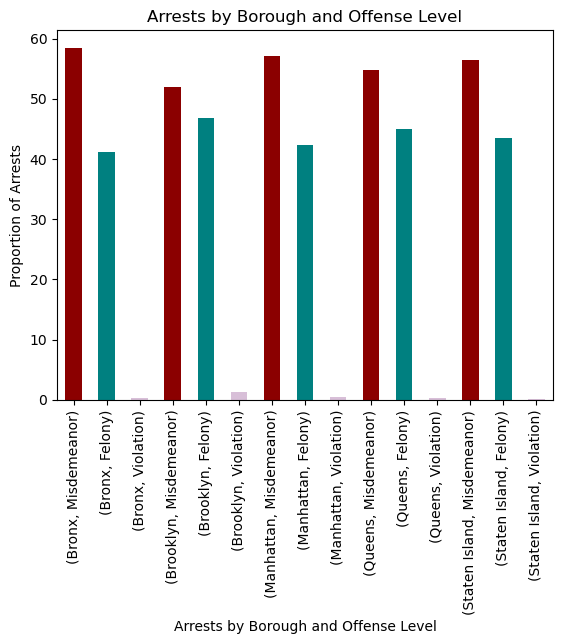

In [183]:
#Displaying proportion grouped by borough and level of offense
df_rename.groupby (['ARREST_BOROUGH'])['LEVEL_OF_OFFENSE'].value_counts(normalize=True).mul(100).plot(kind='bar', color=['darkred', 'teal', 'thistle'])
plt.title('Arrests by Borough and Offense Level')
plt.ylabel("Proportion of Arrests")
plt.xlabel("Arrests by Borough and Offense Level")

Text(0, 0.5, 'Total Arrests')

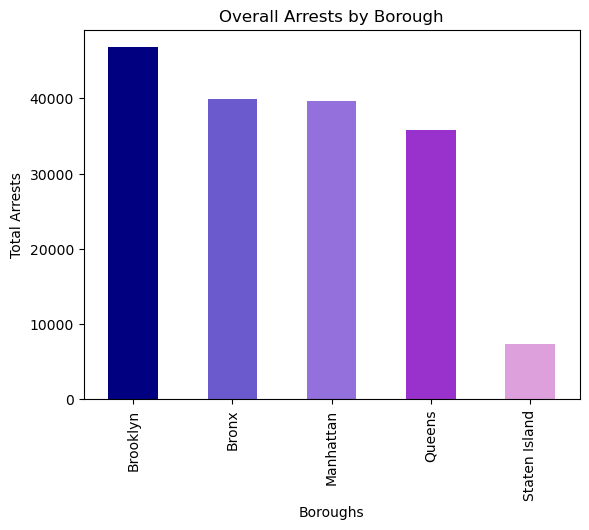

In [173]:
#Displaying count of arrests by borough 
df_rename.groupby (['ARREST_BOROUGH'])['ARREST_BOROUGH'].count().sort_values(ascending=False).plot(kind='bar', color=['navy', 'slateblue', 'mediumpurple', 'darkorchid', 'plum'])
plt.title('Overall Arrests by Borough')
plt.xlabel('Boroughs')
plt.ylabel('Total Arrests')

Text(0.5, 0, 'Level of Offense')

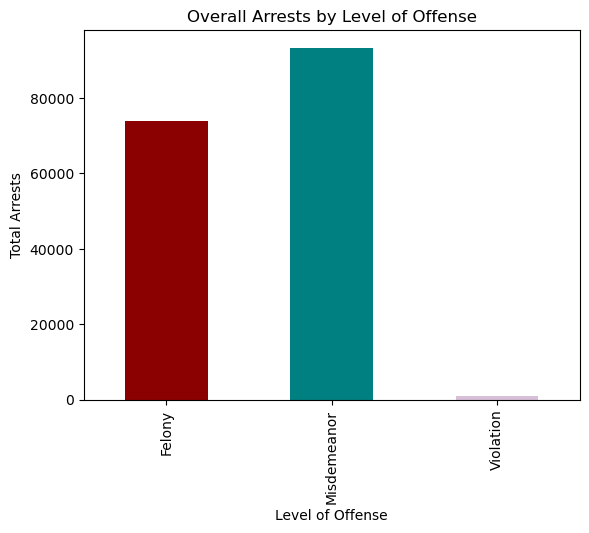

In [174]:
#count of overall Felony, Misdemeanor, and Violations
df_rename.groupby(['LEVEL_OF_OFFENSE'])['LEVEL_OF_OFFENSE'].count().plot(kind='bar', color=['darkred', 'teal', 'thistle'])
plt.title('Overall Arrests by Level of Offense')
plt.ylabel('Total Arrests')
plt.xlabel('Level of Offense')

In [159]:
#count of Felony, Misdemeanor, and Violations for every borough
df_rename.groupby (['ARREST_BOROUGH','LEVEL_OF_OFFENSE'])['LEVEL_OF_OFFENSE'].count()

ARREST_BOROUGH  LEVEL_OF_OFFENSE
Bronx           Felony              16335
                Misdemeanor         23183
                Violation             133
Brooklyn        Felony              21809
                Misdemeanor         24229
                Violation             571
Manhattan       Felony              16493
                Misdemeanor         22247
                Violation             163
Queens          Felony              16010
                Misdemeanor         19508
                Violation              99
Staten Island   Felony               3219
                Misdemeanor          4180
                Violation               7
Name: LEVEL_OF_OFFENSE, dtype: int64

Text(0.5, 0, 'Arrests by Borough and Offense Level')

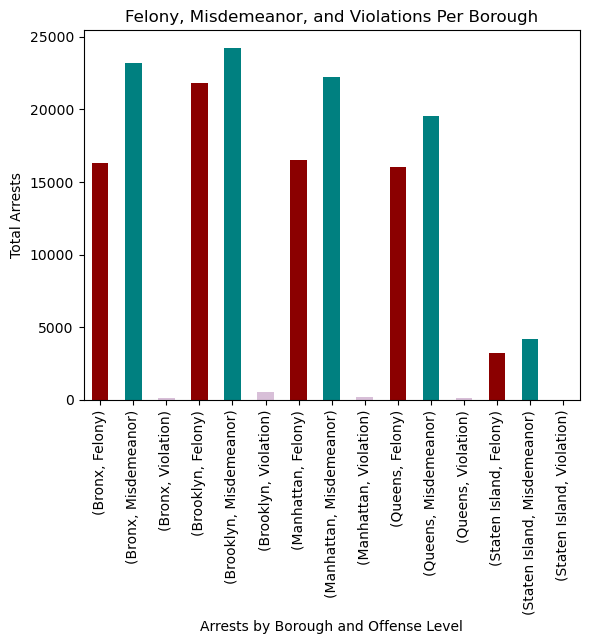

In [185]:
#Displaying count Felony, Misdemeanor, and Violations per borough
df_rename.groupby (['ARREST_BOROUGH','LEVEL_OF_OFFENSE'])['LEVEL_OF_OFFENSE'].count().plot(kind='bar', color=['darkred', 'teal', 'thistle'])
plt.title('Felony, Misdemeanor, and Violations Per Borough')
plt.ylabel("Total Arrests")
plt.xlabel("Arrests by Borough and Offense Level")

In [ ]:
#Analysis
The leading level of offense within the tri-state area is Misdemeanors, then Felonies, and lastly Violations.
The boroughs in which have the most arrests made are Brooklyn, followed by the Bronx, Manhattan, Queens and Staten Island.
I think a bias that could lead to skewing of the data is which boroughs and areas are being policed the most, as 
this would inevitably lead to more observations of crime being committed and more arrest being made.